<a href="https://colab.research.google.com/github/lifewjola/Churn-Prediction-with-RandomForests/blob/main/Customer_Churn_Prediction_Adventure_Works.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction Model for Adventure Works
By Anjolaoluwa Ajayi (DataPrincess)

![image](https://www.viquepedia.com/assets/images/sitelogo/customer-churn-1024x662.jpg)

In [31]:
# Importing all the libraries I need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [2]:
# Ingesting the data

df = pd.read_excel('/content/AdventureWorksCustomers.xlsx', index_col='CustomerKey', na_values='NaN')

### Data Profiling

In [3]:
df.head()

,Prefix,First Name,Last Name,Birth Date,Marital Status,Gender,Email Address,Annual Income,Total Children,Education Level,...,Purchasing Power,Customer Age,Customer Age Group,Churned,Year Churned,Revenue,order quantity,First Purchase Date,Spending habit,Has children
CustomerKey,,,,,,,,,,,,,,,,,,,,,
11019,MR.,LUKE,LAL,"Tuesday, March 7, 1978",S,M,luke18@adventure-works.com,40000,0,High School,...,Low,46,Adults,False,Not Churned,961.9158,51.0,"Tuesday, August 16, 2016",Low,False
11020,MR.,JORDAN,KING,"Wednesday, September 20, 1978",S,M,jordan73@adventure-works.com,40000,0,High School,...,Low,45,Adults,True,2016,2093.0581,3.0,"Saturday, July 2, 2016",Medium,False
11062,MR.,NOAH,POWELL,"Tuesday, September 2, 1975",M,M,noah5@adventure-works.com,40000,0,High School,...,Low,48,Adults,True,2016,2126.7023,4.0,"Monday, July 11, 2016",Medium,False
11064,MR.,CHASE,REED,"Sunday, December 7, 1975",M,M,chase21@adventure-works.com,40000,0,High School,...,Low,48,Adults,True,2016,2069.0781,3.0,"Friday, July 29, 2016",Medium,False
11142,MR.,EDUARDO,PATTERSON,"Sunday, August 14, 1977",S,M,eduardo55@adventure-works.com,40000,0,High School,...,Low,46,Adults,False,Not Churned,1117.2504,50.0,"Wednesday, August 17, 2016",Medium,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18148 entries, 11019 to 29136
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Prefix               18018 non-null  object 
 1   First Name           18148 non-null  object 
 2   Last Name            18148 non-null  object 
 3   Birth Date           18148 non-null  object 
 4   Marital Status       18148 non-null  object 
 5   Gender               18148 non-null  object 
 6   Email Address        18148 non-null  object 
 7   Annual Income        18148 non-null  int64  
 8   Total Children       18148 non-null  int64  
 9   Education Level      18148 non-null  object 
 10  Occupation           18148 non-null  object 
 11  Home Owner           18148 non-null  bool   
 12  Purchasing Power     18148 non-null  object 
 13  Customer Age         18148 non-null  int64  
 14  Customer Age Group   18148 non-null  object 
 15  Churned              18148 non-n

In [5]:
df.nunique()

Prefix                     3
First Name               666
Last Name                372
Birth Date              8190
Marital Status             2
Gender                     3
Email Address          18148
Annual Income             16
Total Children             6
Education Level            5
Occupation                 5
Home Owner                 2
Purchasing Power           3
Customer Age              70
Customer Age Group         2
Churned                    2
Year Churned               3
Revenue                 6841
order quantity            51
First Purchase Date      911
Spending habit             3
Has children               2
dtype: int64

In [6]:
df.isnull().sum()

Prefix                 130
First Name               0
Last Name                0
Birth Date               0
Marital Status           0
Gender                   0
Email Address            0
Annual Income            0
Total Children           0
Education Level          0
Occupation               0
Home Owner               0
Purchasing Power         0
Customer Age             0
Customer Age Group       0
Churned                  0
Year Churned             0
Revenue                732
order quantity         732
First Purchase Date    732
Spending habit           0
Has children             0
dtype: int64

**Preliminary Actions to take on df**
- Drop columns that I intuitively know won't be useful for prediction
- Fill the missing values in revenue and order quantity columns with 0
- Fill purchase date with today's date
-Fix the data types of some of the potentially useful columns

### Data Preprocessing
Carrying out all preliminary actions

In [7]:
df.drop(columns=['Prefix', 'First Name', 'Last Name', 'Birth Date', 'Email Address', 'Year Churned'], inplace=True)

In [8]:
# handling missing values appropriately

today = pd.to_datetime('2024-03-06')
df['First Purchase Date'] = df['First Purchase Date'].fillna(today, inplace=True)

df =df.fillna(0)

df.isnull().sum()

Marital Status         0
Gender                 0
Annual Income          0
Total Children         0
Education Level        0
Occupation             0
Home Owner             0
Purchasing Power       0
Customer Age           0
Customer Age Group     0
Churned                0
Revenue                0
order quantity         0
First Purchase Date    0
Spending habit         0
Has children           0
dtype: int64

In [9]:
# Convert binary Columns to boolean dtype
bool_col = ['Marital Status', 'Gender','Home Owner',
    'Churned', 'Has children']
df[bool_col] = df[bool_col].replace({"TRUE": True, "FALSE": False}).astype(bool)

In [10]:
# convert other categorical columns to category data type
cat_col = ['Education Level', 'Occupation', 'Purchasing Power',
           'Customer Age Group', 'Spending habit']

df[cat_col] = df[cat_col].astype('category')

In [11]:
# Inspecting all numerical columns
# to determine the perfect dta type and range

df['order quantity'].max()

106.0

In [12]:
# convert numerical columns to suitable types and ranges

df['Annual Income'] = df['Annual Income'].astype('int32')
df['Revenue'] = df['Revenue'].astype('float32')
df['Customer Age'] = df['Customer Age'].astype('int8')
df['order quantity'] = df['order quantity'].astype('int8')
df['Total Children'] = df['Total Children'].astype('int8')

In [13]:
# convert first purchase data to datetime dtype

df['First Purchase Date'] = pd.to_datetime(df['First Purchase Date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18148 entries, 11019 to 29136
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Marital Status       18148 non-null  bool          
 1   Gender               18148 non-null  bool          
 2   Annual Income        18148 non-null  int32         
 3   Total Children       18148 non-null  int8          
 4   Education Level      18148 non-null  category      
 5   Occupation           18148 non-null  category      
 6   Home Owner           18148 non-null  bool          
 7   Purchasing Power     18148 non-null  category      
 8   Customer Age         18148 non-null  int8          
 9   Customer Age Group   18148 non-null  category      
 10  Churned              18148 non-null  bool          
 11  Revenue              18148 non-null  float32       
 12  order quantity       18148 non-null  int8          
 13  First Purchase Date  18148 

Awesome! The data is ready for EDA now :)

### Exploratory Data Analysis

In [15]:
df.describe()

,Annual Income,Total Children,Customer Age,Revenue,order quantity
count,18148.000000,18148.000000,18148.000000,18148.000000,18148.000000
mean,57269.120564,1.843619,61.622052,1372.855835,4.638197
std,32236.535573,1.613203,11.263259,1869.627930,4.218429
min,10000.000000,0.000000,43.000000,0.000000,0.000000
25%,30000.000000,0.000000,53.000000,64.559998,2.000000
50%,60000.000000,2.000000,60.000000,235.698402,4.000000
75%,70000.000000,3.000000,69.000000,2197.462402,6.000000
max,170000.000000,5.000000,113.000000,12407.955078,106.000000


<Axes: >

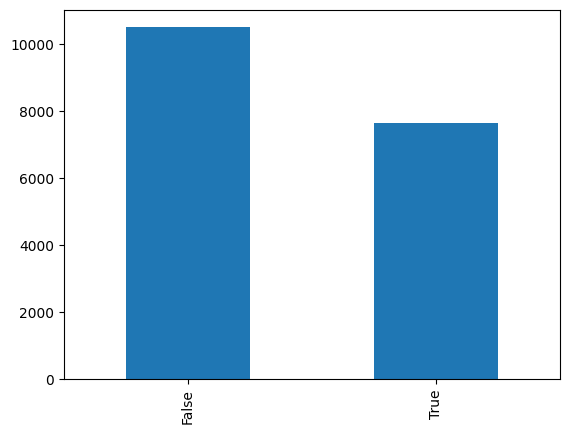

In [16]:
# Count of churned and not churned customers

df['Churned'].value_counts().plot(kind='bar')

In [18]:
num_col = ['Revenue', 'order quantity', 'Customer Age',
           'Total Children', 'Annual Income']

nonnum_col = ['Marital Status', 'Gender', 'Education Level',
              'Occupation', 'Home Owner', 'Purchasing Power',
              'Customer Age Group', 'Churned','Spending habit', 'Has children']

<Axes: >

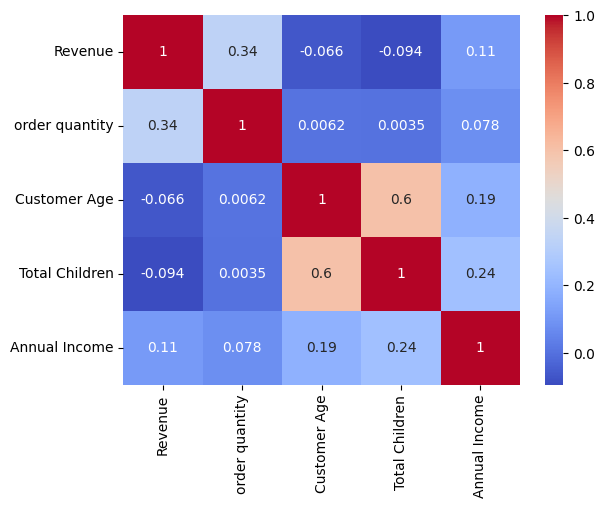

In [19]:
# Correlation between numerical volumns

sns.heatmap(df[num_col].corr(method='spearman'), annot=True, cmap='coolwarm')

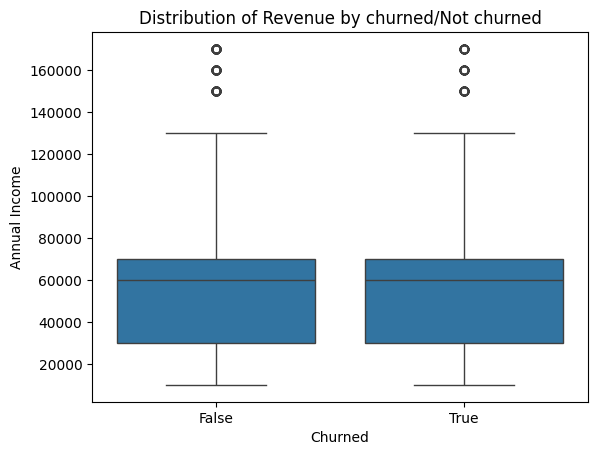

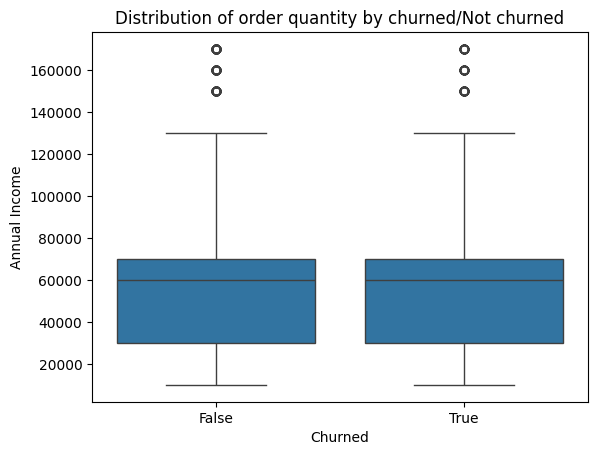

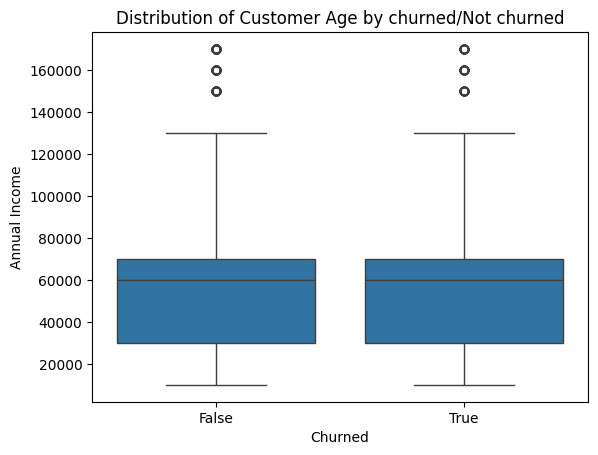

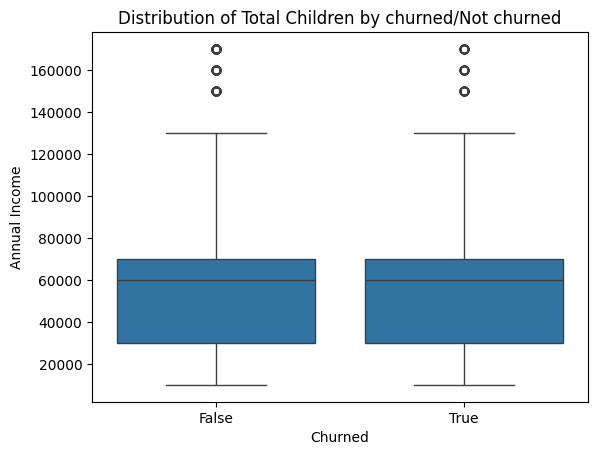

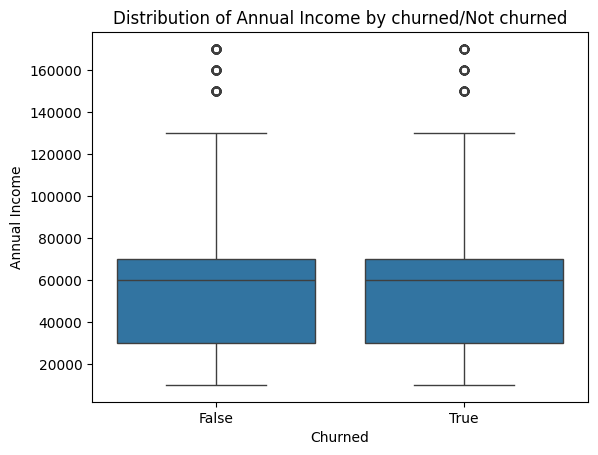

In [20]:
# Distribution of numerical columns based on churned/not churned

for col in num_col:
    sns.boxplot(x='Churned', y='Annual Income', data=df)
    plt.title(f"Distribution of {col} by churned/Not churned")
    plt.show()

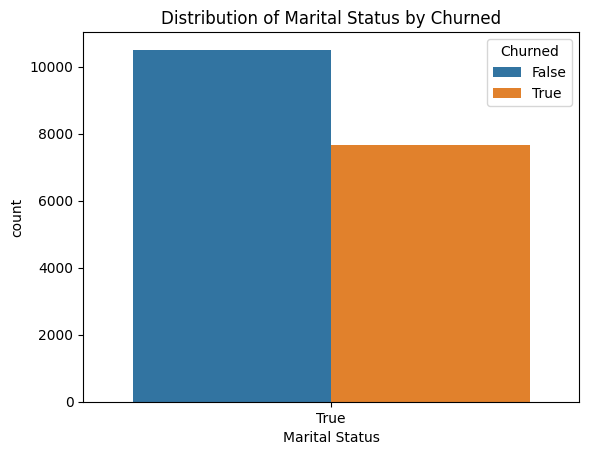

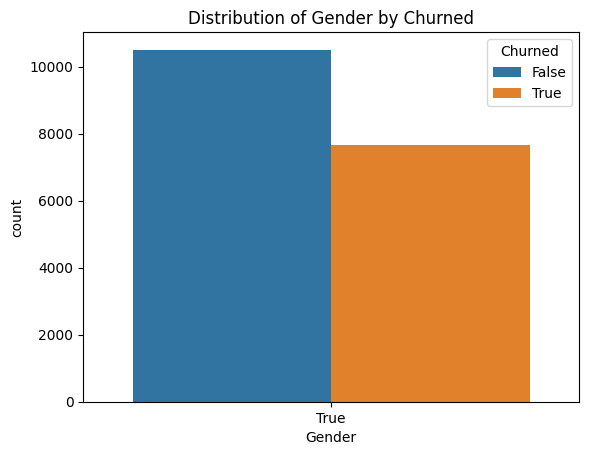

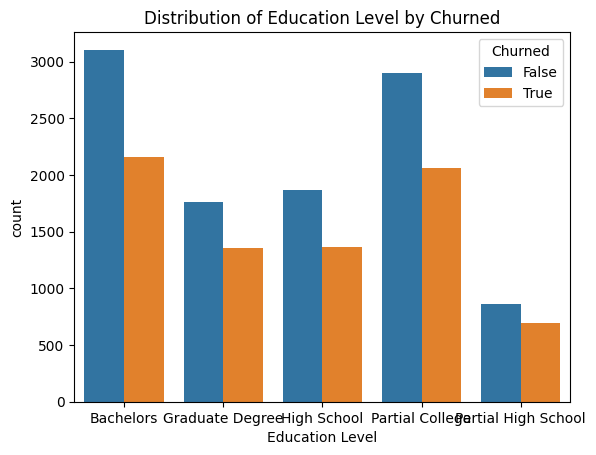

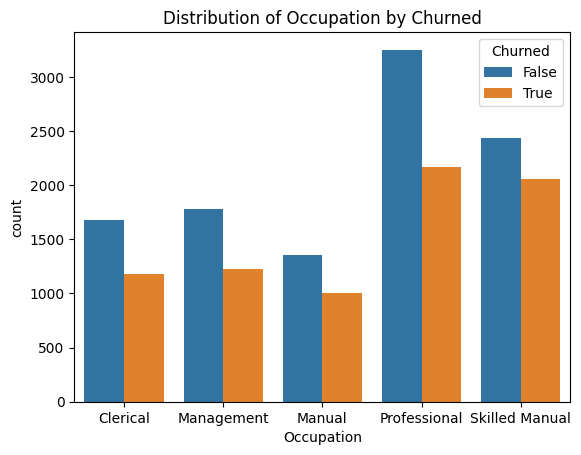

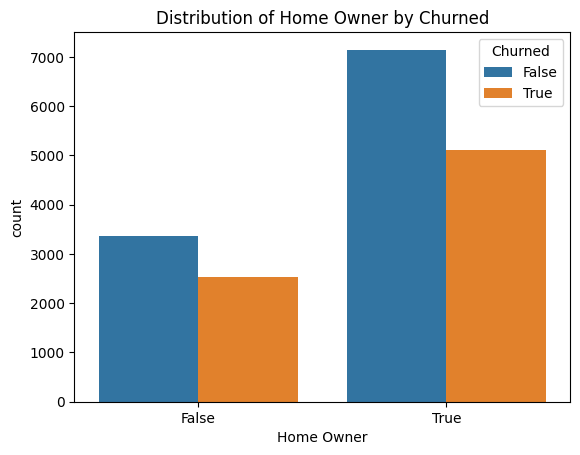

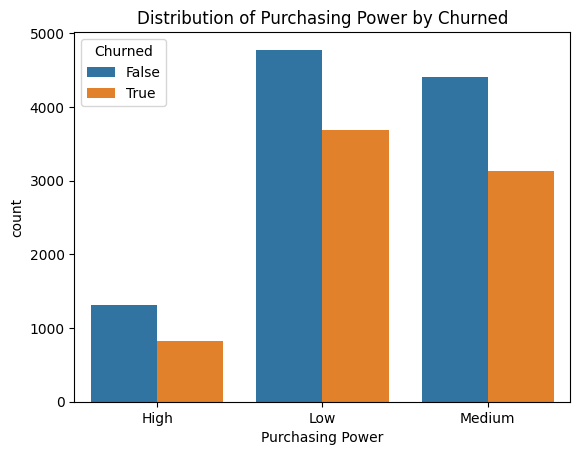

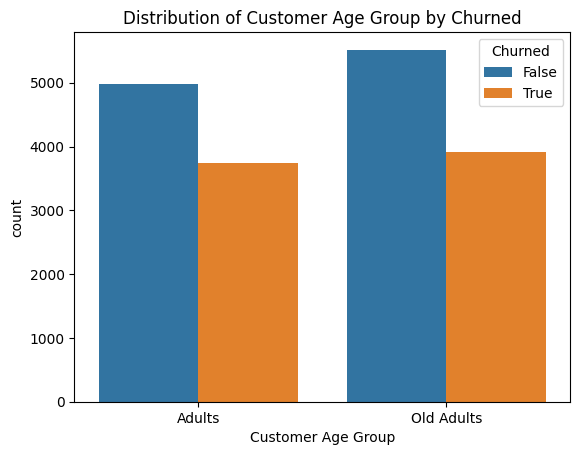

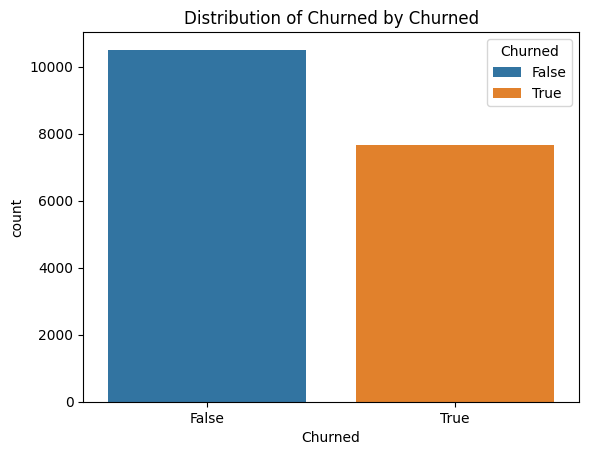

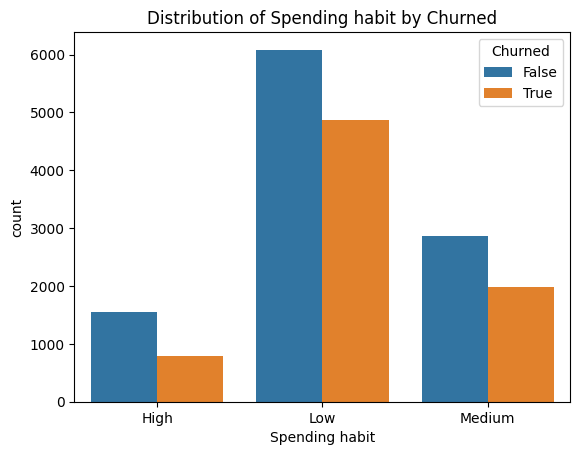

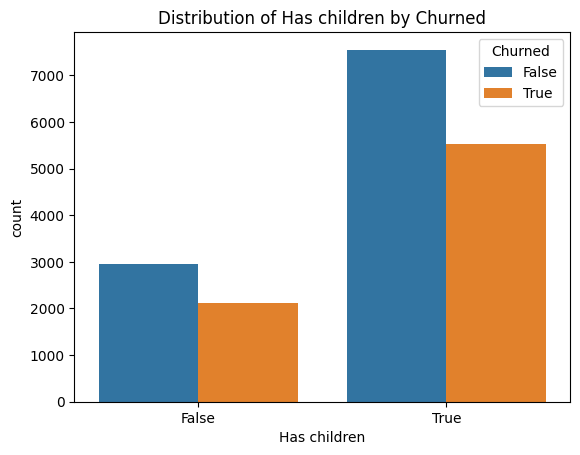

In [21]:
# Count of categorical columns based on churned/ not churned

for col in nonnum_col:
    sns.countplot(data=df, x=col, hue='Churned')
    plt.title(f'Distribution of {col} by Churned')
    plt.show()

**Next Steps**
- Encoding the boolean and categorical values appropriately

- Feature engineering:
    - Calculate customer lifetime using first time purchase date column
- Feature Selection
- Train test split data



### Data Transformation

In [22]:
# Encoding boolean columns

df[bool_col] = df[bool_col].astype('int8')

In [23]:
# One Hot Encoding for Nominal categorical columns

df = pd.get_dummies(df, columns=['Customer Age Group'])

In [24]:
ocat_col = ['Education Level', 'Occupation','Purchasing Power','Spending habit']

# Ordinal encoding for Ordinal Categorical columns
label_encoder = LabelEncoder()

# Fit and transform ordinal column
for col in ocat_col:
    df[col] = label_encoder.fit_transform(df[col])

In [25]:
# Get customer lifetime from their first purchase date and today's date

df['customer lifetime'] = (today - df['First Purchase Date']).dt.days

Inference: Customer lifetime is a strong predictor since there's a clear distinction between the densities of churned and not churned

### Feature Selection (Iterative)

In [26]:
df.columns

Index(['Marital Status', 'Gender', 'Annual Income', 'Total Children',
       'Education Level', 'Occupation', 'Home Owner', 'Purchasing Power',
       'Customer Age', 'Churned', 'Revenue', 'order quantity',
       'First Purchase Date', 'Spending habit', 'Has children',
       'Customer Age Group_Adults', 'Customer Age Group_Old Adults',
       'customer lifetime'],
      dtype='object')

In [27]:
X = df[['Annual Income', 'Total Children',
       'Customer Age', 'Revenue', 'order quantity']]
y = df['Churned']

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


### Training the Model (Iterative)

In [35]:
clf = RandomForestClassifier()

# Training the model and evaluating performance on validation set
best_accuracy = 0.0

for i in range(1, 101):
    clf.fit(X_train, y_train)
    y_pred_val = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)

    print(f"{i}. Validation Accuracy = {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        clf=clf
    else:
        print("Early stopping")
        break

1. Validation Accuracy = 0.6439
2. Validation Accuracy = 0.6433
Early stopping


### Feature Importance Analysis (Iterative)

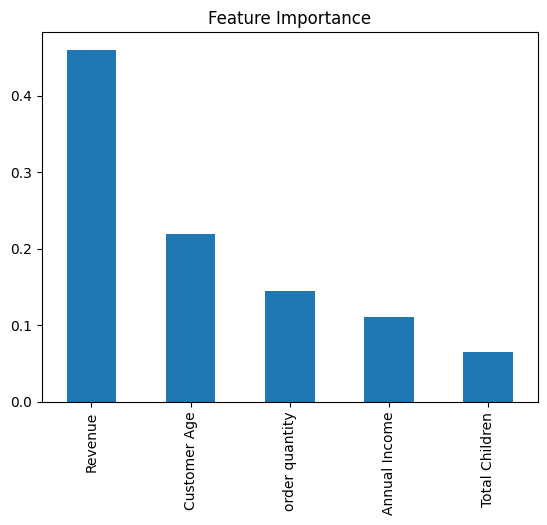

In [36]:
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

### Cross Validation

In [37]:
# cross-validation on the training data
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

cv_scores
# cv_scores.mean()

array([0.62935859, 0.64098149, 0.63710719, 0.63237193, 0.64341085])

### Model Evaluation (Iterative)

In [38]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.6465564738292011
ROC AUC Score: 0.6227022896569634


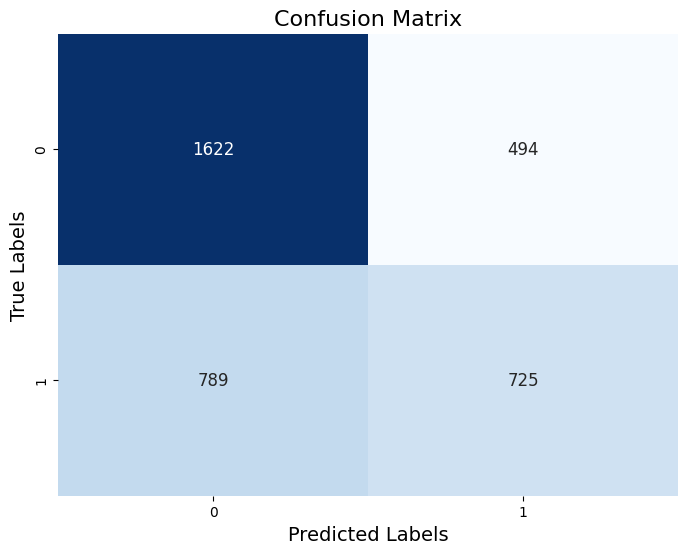

In [39]:
# confusion matrix with heatmap
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize":12}, cbar=False)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

plt.show()
